# Final Exam 

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [119]:
df = pd.read_csv('Topic_Survey_Assignment.csv',index_col=0)

In [120]:
df.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


In [121]:
df.sort_values(by='Very interested',ascending=False,inplace=True)
df['tot'] = df.sum(axis=1)
df

,Very interested,Somewhat interested,Not interested,tot
Data Analysis / Statistics,1688,444,60,2192
Machine Learning,1629,477,74,2180
Data Visualization,1340,734,102,2176
Big Data (Spark / Hadoop),1332,729,127,2188
Deep Learning,1263,770,136,2169
Data Journalism,429,1081,610,2120


In [122]:
df_r = df/2233*100
# df_r = df.div(df['tot'], axis=0)*100
# df_r['tot'] = df_r.sum(axis=1)
df_r = df_r.round(decimals=2)

df_r.drop(columns='tot',inplace=True)
df_r

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09
Data Journalism,19.21,48.41,27.32


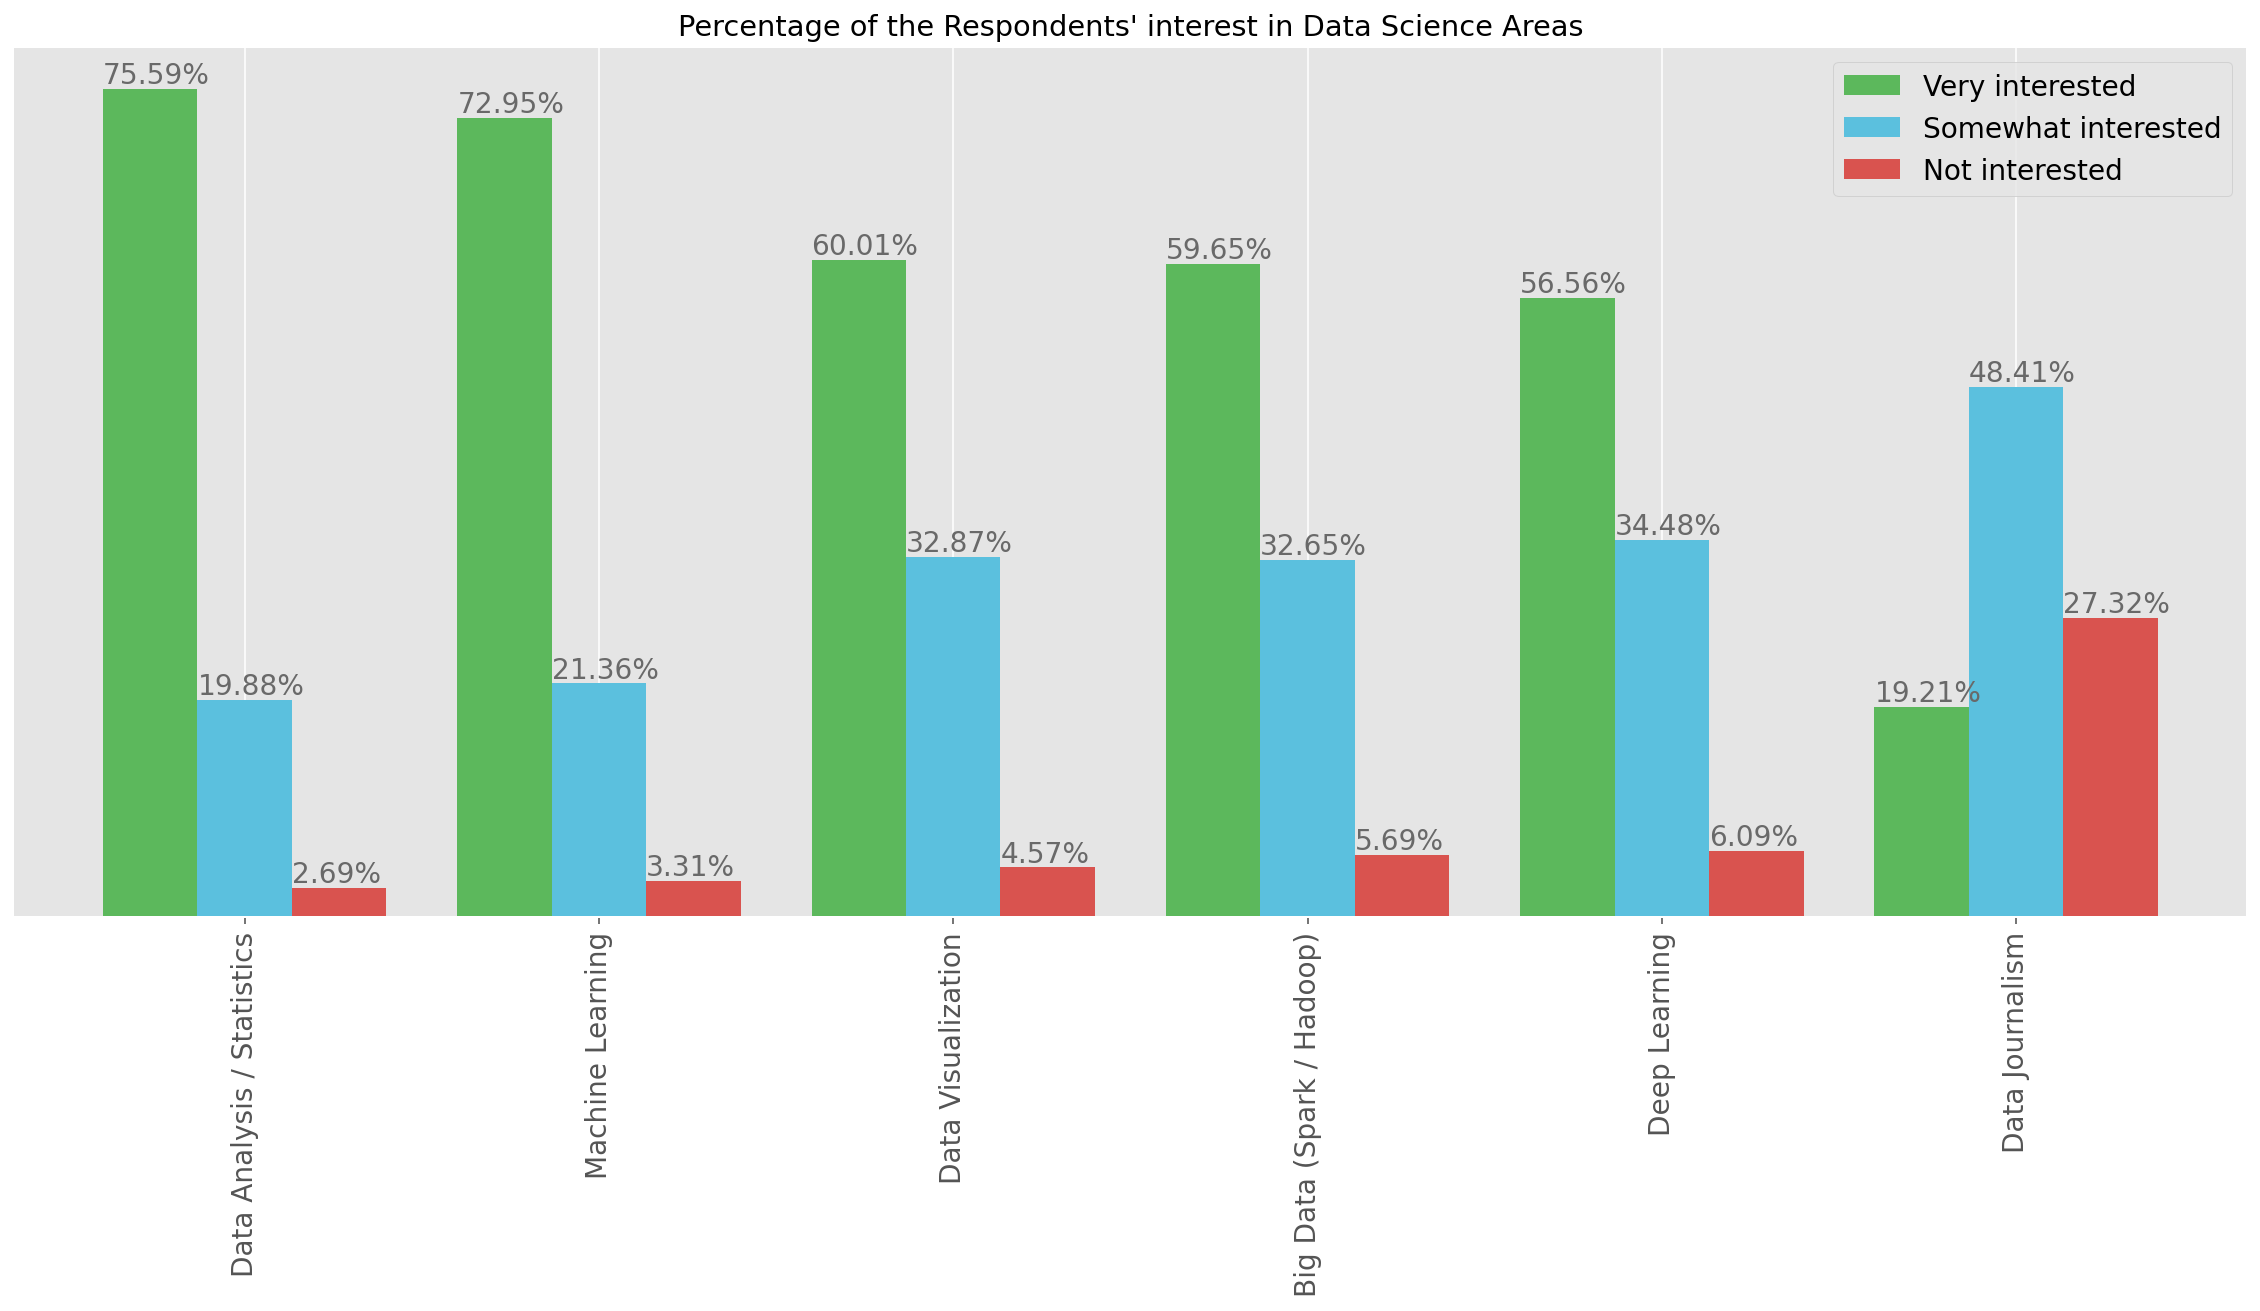

In [123]:
ax = df_r.plot(kind='bar',figsize=(20,8),width=0.8,
              color=['#5cb85c', '#5bc0de', '#d9534f'])
plt.title("Percentage of the Respondents' interest in Data Science Areas")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+.5, \
            str(i.get_height())+'%', fontsize=14,
                color='dimgrey')
    
SMALL_SIZE = 8
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

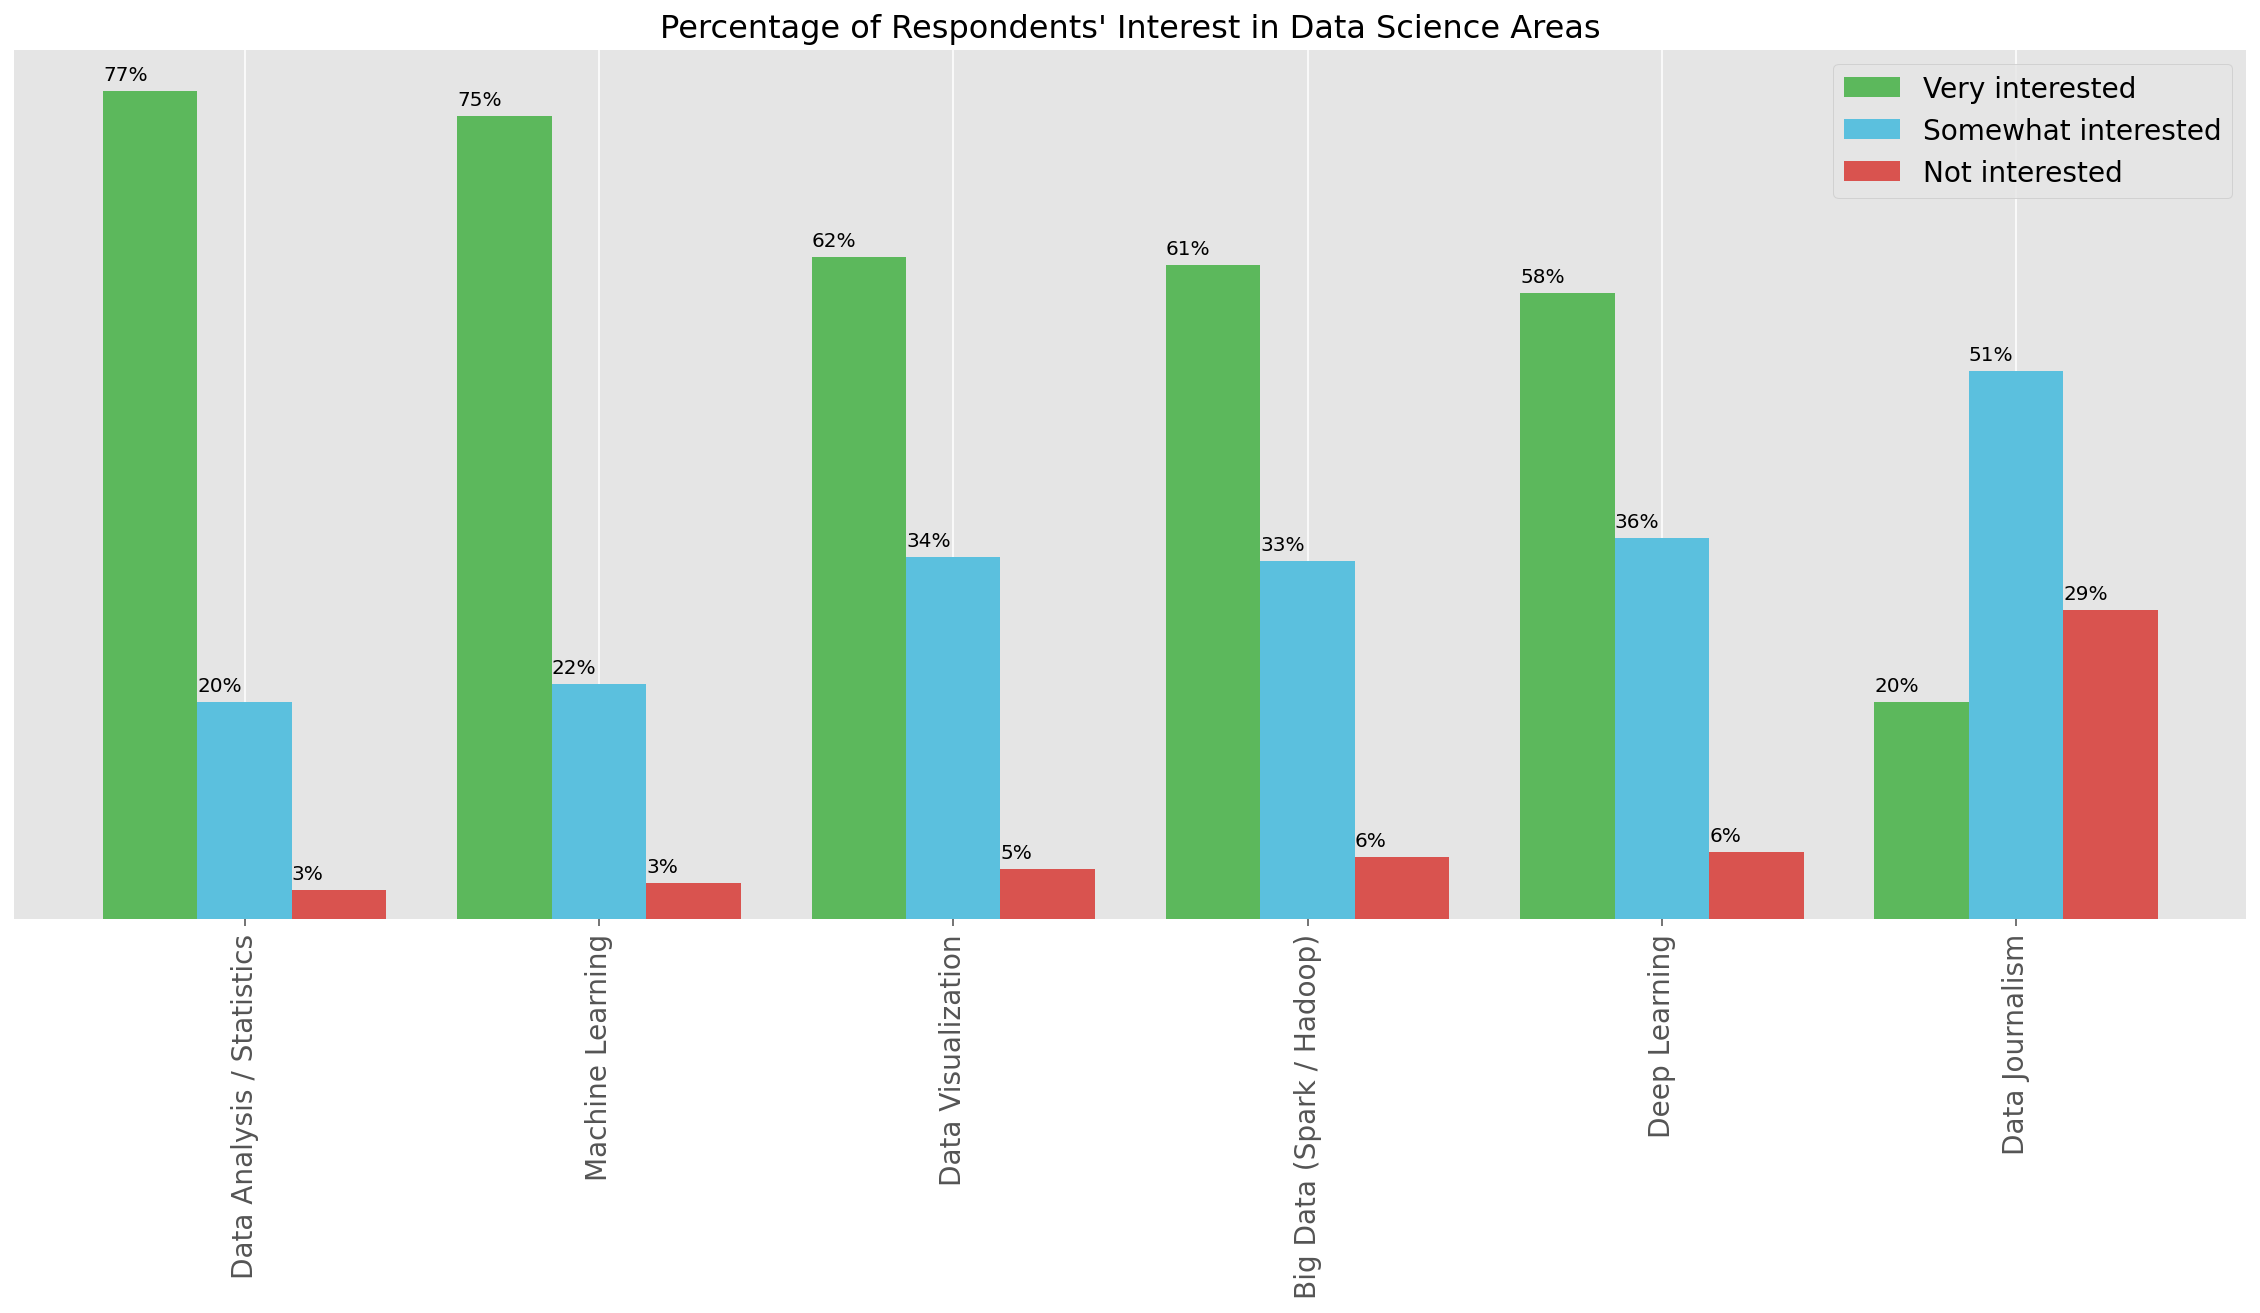

In [124]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# mpl.style.use('ggplot') # optional: for ggplot-like style

df_surv = pd.read_csv('https://cocl.us/datascience_survey_data',index_col = 0)
df_surv.sort_values(by='Very interested', ascending=False, inplace=True)

# Change this line to plot percentages instead of absolute values
ax = (df_surv.div(df_surv.sum(1), axis=0)).plot(kind='bar', figsize=(20, 8), width = 0.8, color = ['#5cb85c','#5bc0de','#d9534f'])
plt.legend(labels=df_surv.columns,fontsize= 14)
plt.title("Percentage of Respondents' Interest in Data Science Areas",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height), (x, y + height + 0.01))

plt.show()

In [125]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

# !conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [126]:
df_incidents = pd.read_csv('https://cocl.us/sanfran_crime_dataset', index_col=0,)
df_incidents.rename(columns={'PdDistrict':'Neighborhood'}, inplace=True)
df_incidents_1 = df_incidents.groupby(['Neighborhood']).size().reset_index(name='Count') 
df_incidents_1

,Neighborhood,Count
0,BAYVIEW,14303
1,CENTRAL,17666
2,INGLESIDE,11594
3,MISSION,19503
4,NORTHERN,20100
5,PARK,8699
6,RICHMOND,8922
7,SOUTHERN,28445
8,TARAVAL,11325
9,TENDERLOIN,9942


In [133]:

sanfran_geo = r'san-francisco.geojson' # geojson file

# create a plain world map
sanfran_map = folium.Map(location=[37.77,-122.42], zoom_start=12)

# generate choropleth map
sanfran_map.choropleth(
    geo_data=sanfran_geo,
    data=df_incidents_1,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

# display map
sanfran_map